# Simple deep neural network with Tensorflow 2

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

## Data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
x_train[17,25,30]

array([0.18039216, 0.1764706 , 0.2       ], dtype=float32)

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_train[54, 12, 13, 1] 

0.36862746

## Architecture

In [10]:
input_layer = Input((32,32,3))
# input 
x = Flatten()(input_layer)

# hidden layers
x = Dense(150, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

#output
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

# define model specifying input and output layers
model = Model(input_layer, output_layer)

# gives summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               460950    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 485,110
Trainable params: 485,110
Non-trainable params: 0
_________________________________________________________________


## Train

In [11]:
opt = Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 115us/sample - loss: 1.8560 - accuracy: 0.3352
Epoch 2/10
50000/50000 [==============================] - 5s 101us/sample - loss: 1.6695 - accuracy: 0.4088
Epoch 3/10
50000/50000 [==============================] - 5s 101us/sample - loss: 1.5922 - accuracy: 0.4370
Epoch 4/10
50000/50000 [==============================] - 5s 105us/sample - loss: 1.5415 - accuracy: 0.4536
Epoch 5/10
50000/50000 [==============================] - 5s 102us/sample - loss: 1.5013 - accuracy: 0.4679
Epoch 6/10
50000/50000 [==============================] - 5s 108us/sample - loss: 1.4727 - accuracy: 0.4799
Epoch 7/10
50000/50000 [==============================] - 5s 106us/sample - loss: 1.4416 - accuracy: 0.4905
Epoch 8/10
50000/50000 [==============================] - 5s 105us/sample - loss: 1.4204 - accuracy: 0.4969
Epoch 9/10
50000/50000 [==============================] - 5s 104us/sample - loss: 1.3997 - accuracy: 0.5040
Epoch

## Analysis

In [ ]:
model.evaluate(x_test, y_test)

In [14]:
print(model.metrics_names)

['loss', 'accuracy']


In [15]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_class = CLASSES[np.argmax(preds, axis = -1)]
actual_class = CLASSES[np.argmax(y_test, axis = -1)]

In [16]:
preds[11]

array([1.1494465e-03, 2.1183440e-01, 1.6470746e-03, 4.8085321e-03,
       9.8454405e-04, 1.7376461e-03, 2.6167817e-03, 5.7574193e-04,
       3.7492555e-02, 7.3715323e-01], dtype=float32)

In [17]:
preds_class[0:9]

array(['cat', 'ship', 'ship', 'ship', 'deer', 'frog', 'automobile',
       'frog', 'deer'], dtype='<U10')

In [18]:
actual_class[0:9]

array(['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile',
       'frog', 'cat'], dtype='<U10')

In [19]:
preds_class[11]==actual_class[11]

True

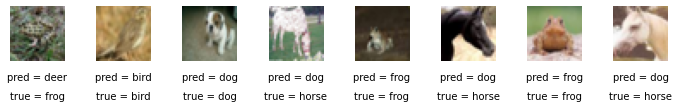

In [60]:

n_to_show = 8
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(12, 1))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_class[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'true = ' + str(actual_class[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
